In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv(r"E:/Downloads/kddcup99_csv.csv")
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.00,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.00,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.00,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.00,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.00,0.0,normal
5,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.00,0.00,0.00,0.0,normal
6,0,tcp,http,SF,212,1940,0,0,0,0,...,69,1.0,0.0,1.00,0.04,0.00,0.00,0.00,0.0,normal
7,0,tcp,http,SF,159,4087,0,0,0,0,...,79,1.0,0.0,0.09,0.04,0.00,0.00,0.00,0.0,normal
8,0,tcp,http,SF,210,151,0,0,0,0,...,89,1.0,0.0,0.12,0.04,0.00,0.00,0.00,0.0,normal
9,0,tcp,http,SF,212,786,0,0,0,1,...,99,1.0,0.0,0.12,0.05,0.00,0.00,0.00,0.0,normal


In [2]:
from sklearn.utils import shuffle
data = shuffle(data)
val=data.iloc[int(0.8*data.shape[0]):,:].copy()
train=data.iloc[:int(0.8*data.shape[0]),:].copy()

In [3]:
l=[]
for i in val.index:
    if i in train.index:
        l.append(1)
len(l)

0

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395216 entries, 220207 to 38752
Data columns (total 42 columns):
duration                       395216 non-null int64
protocol_type                  395216 non-null object
service                        395216 non-null object
flag                           395216 non-null object
src_bytes                      395216 non-null int64
dst_bytes                      395216 non-null int64
land                           395216 non-null int64
wrong_fragment                 395216 non-null int64
urgent                         395216 non-null int64
hot                            395216 non-null int64
num_failed_logins              395216 non-null int64
logged_in                      395216 non-null int64
lnum_compromised               395216 non-null int64
lroot_shell                    395216 non-null int64
lsu_attempted                  395216 non-null int64
lnum_root                      395216 non-null int64
lnum_file_creations            395

In [5]:
train.nunique()

duration                       2109
protocol_type                     3
service                          66
flag                             11
src_bytes                      3063
dst_bytes                      9760
land                              2
wrong_fragment                    3
urgent                            3
hot                              22
num_failed_logins                 6
logged_in                         2
lnum_compromised                 19
lroot_shell                       2
lsu_attempted                     3
lnum_root                        16
lnum_file_creations              14
lnum_shells                       3
lnum_access_files                 6
lnum_outbound_cmds                1
is_host_login                     1
is_guest_login                    2
count                           477
srv_count                       449
serror_rate                      90
srv_serror_rate                  48
rerror_rate                      75
srv_rerror_rate             

In [6]:
data.nunique()

duration                        2495
protocol_type                      3
service                           66
flag                              11
src_bytes                       3300
dst_bytes                      10725
land                               2
wrong_fragment                     3
urgent                             4
hot                               22
num_failed_logins                  6
logged_in                          2
lnum_compromised                  23
lroot_shell                        2
lsu_attempted                      3
lnum_root                         20
lnum_file_creations               18
lnum_shells                        3
lnum_access_files                  7
lnum_outbound_cmds                 1
is_host_login                      1
is_guest_login                     2
count                            490
srv_count                        470
serror_rate                       92
srv_serror_rate                   51
rerror_rate                       77
s

In [7]:
train.drop(['lnum_outbound_cmds','is_host_login'],axis=1, inplace=True)

In [8]:
train.corr()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
duration,1.000000,3.767028e-03,0.005688,-0.000442,-0.003213,0.000192,0.012957,0.005169,-0.016882,0.053312,...,0.009242,-0.116894,-0.117696,0.401703,0.041939,-0.006911,-0.030172,-0.030404,0.005849,0.010038
src_bytes,0.003767,1.000000e+00,-0.000007,-0.000020,-0.000140,-0.000006,0.004366,-0.000029,0.001437,0.000100,...,-0.001419,-0.003443,-0.002447,0.000694,-0.000936,0.000910,-0.000659,0.001382,-0.000363,0.001562
dst_bytes,0.005688,-6.965059e-06,1.000000,-0.000174,-0.001264,0.001728,0.004464,0.054499,0.049110,0.021469,...,-0.048420,-0.005611,0.006514,-0.005450,-0.021170,0.009760,-0.011347,-0.011235,-0.004882,-0.005482
land,-0.000442,-2.018692e-05,-0.000174,1.000000,-0.000312,-0.000014,-0.000292,-0.000066,-0.002736,-0.000035,...,-0.023201,-0.011403,0.001365,0.000121,0.003236,0.081687,0.011933,0.008047,-0.001435,-0.001636
wrong_fragment,-0.003213,-1.402883e-04,-0.001264,-0.000312,1.000000,-0.000102,-0.002117,-0.000481,-0.019873,-0.000253,...,-0.005206,-0.058856,-0.055095,0.071608,-0.031975,0.012265,-0.018967,-0.022054,0.029163,-0.011881
urgent,0.000192,-6.338676e-06,0.001728,-0.000014,-0.000102,1.000000,-0.000095,-0.000022,0.005115,0.000733,...,-0.007594,-0.003778,-0.001319,0.018906,-0.000452,-0.000337,-0.000991,-0.000988,-0.000538,-0.000532
hot,0.012957,4.366437e-03,0.004464,-0.000292,-0.002117,-0.000095,1.000000,0.008946,0.106011,0.007318,...,-0.026483,-0.038552,-0.028973,0.000898,-0.053317,-0.004348,-0.019611,-0.020339,-0.006514,-0.007685
num_failed_logins,0.005169,-2.914504e-05,0.054499,-0.000066,-0.000481,-0.000022,0.008946,1.000000,-0.001630,0.004274,...,-0.026146,-0.015933,0.000861,0.001245,-0.009595,0.018809,-0.001769,-0.002366,0.025636,0.024253
logged_in,-0.016882,1.436721e-03,0.049110,-0.002736,-0.019873,0.005115,0.106011,-0.001630,1.000000,0.012748,...,-0.620656,0.119209,0.161055,-0.061157,-0.461722,0.138088,-0.190916,-0.191600,-0.090925,-0.088006
lnum_compromised,0.053312,9.990593e-05,0.021469,-0.000035,-0.000253,0.000733,0.007318,0.004274,0.012748,1.000000,...,-0.008613,-0.004498,-0.002322,0.000536,-0.006233,0.000901,-0.002079,-0.001744,-0.000765,-0.000804


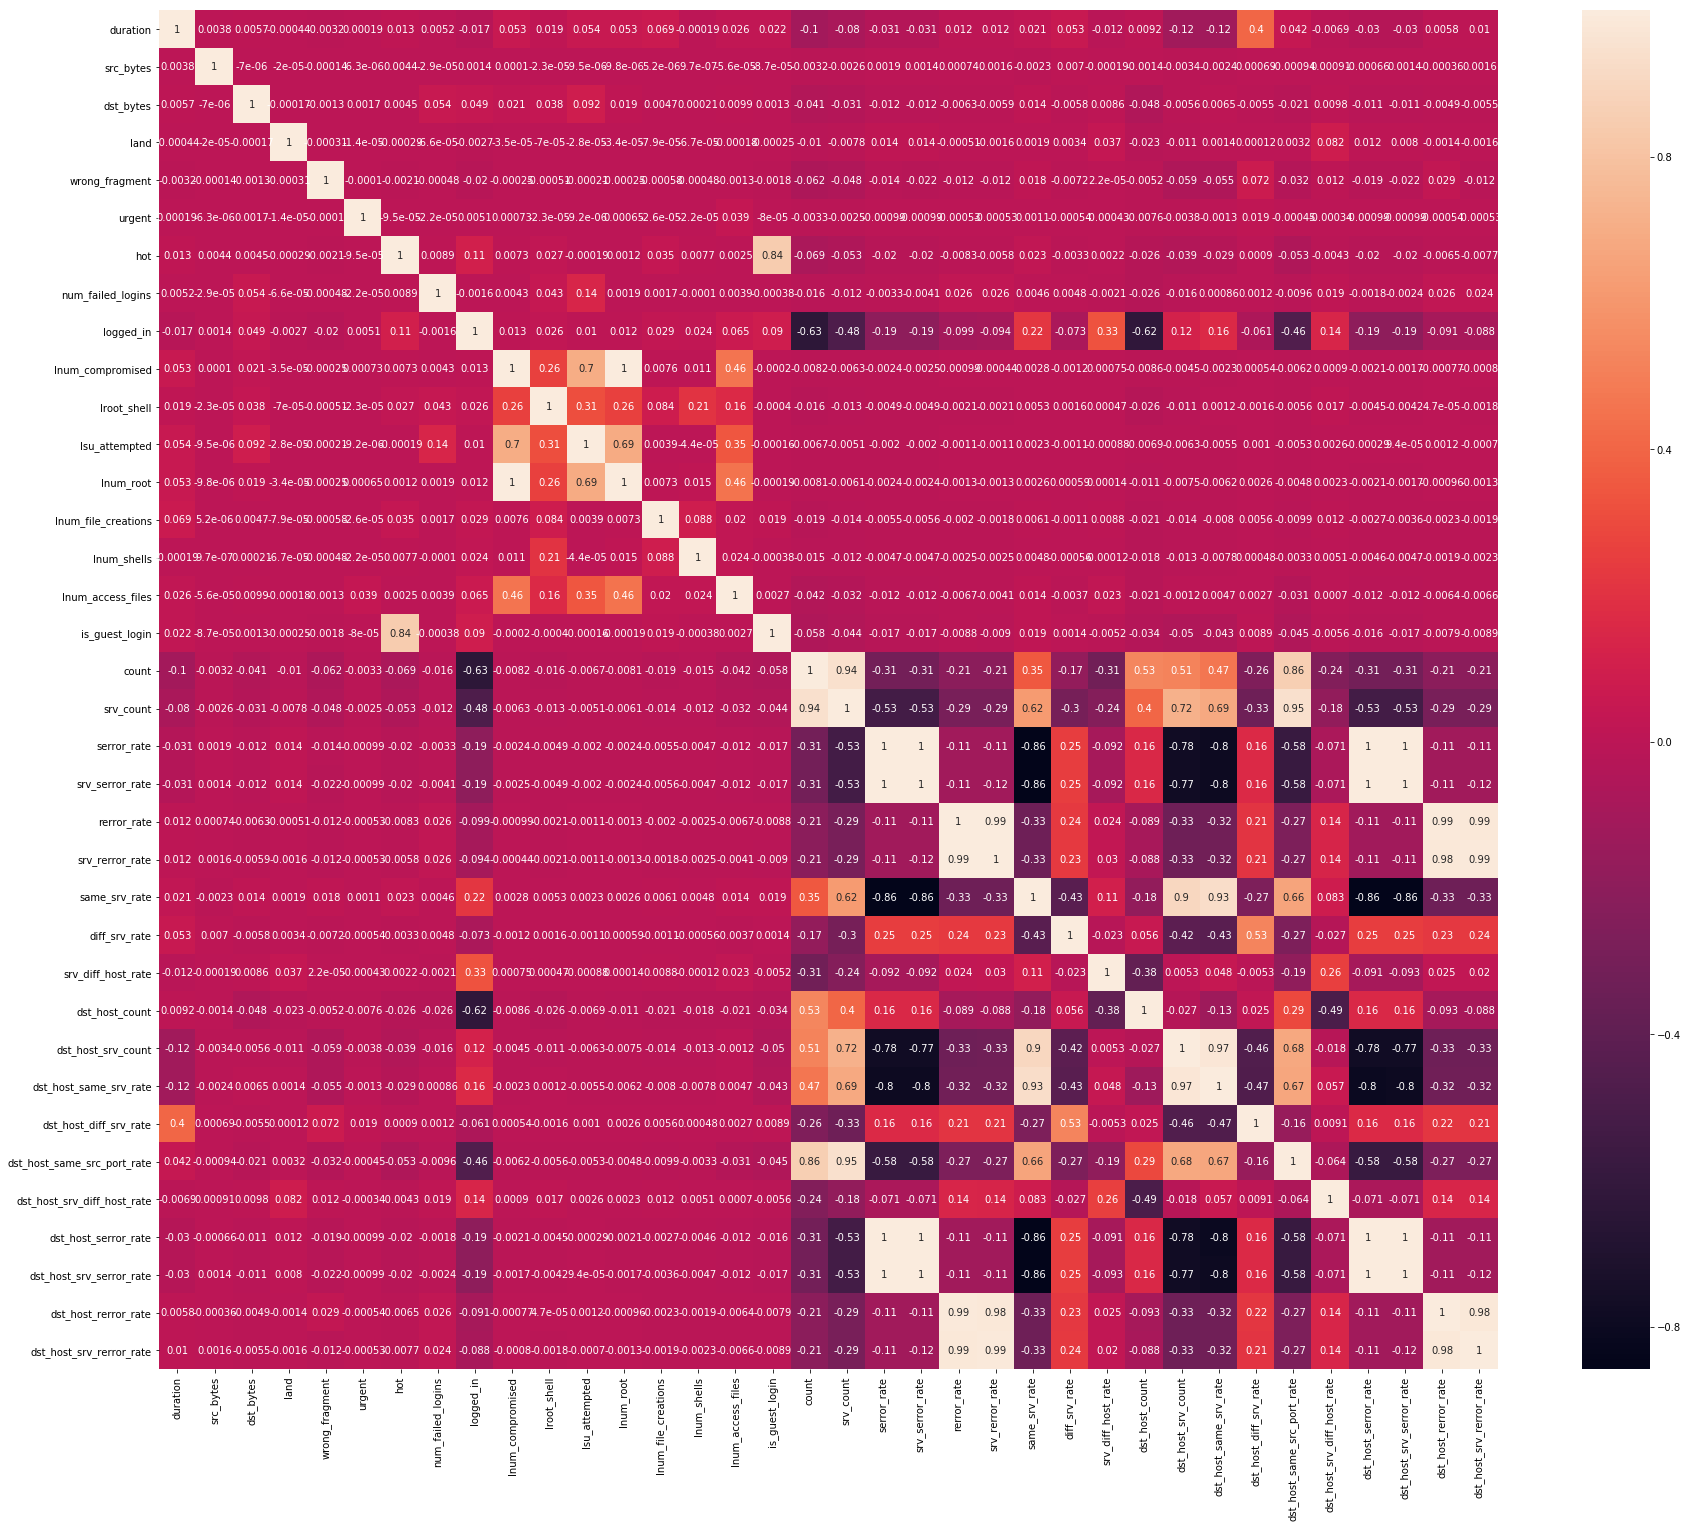

In [9]:
corr=train.corr()
plt.figure(figsize=(30,25))
sns.heatmap(corr,annot=True)

In [10]:
train.drop(['serror_rate','rerror_rate'],axis=1,inplace=True)
train.drop(['dst_host_srv_count','dst_host_serror_rate','dst_host_rerror_rate'],axis=1,inplace=True)
train.drop(['dst_host_srv_serror_rate','srv_serror_rate'],axis=1,inplace=True)


In [11]:
train.drop(['lnum_root'],axis=1,inplace=True)

In [12]:
train.drop(['srv_rerror_rate'],axis=1,inplace=True)

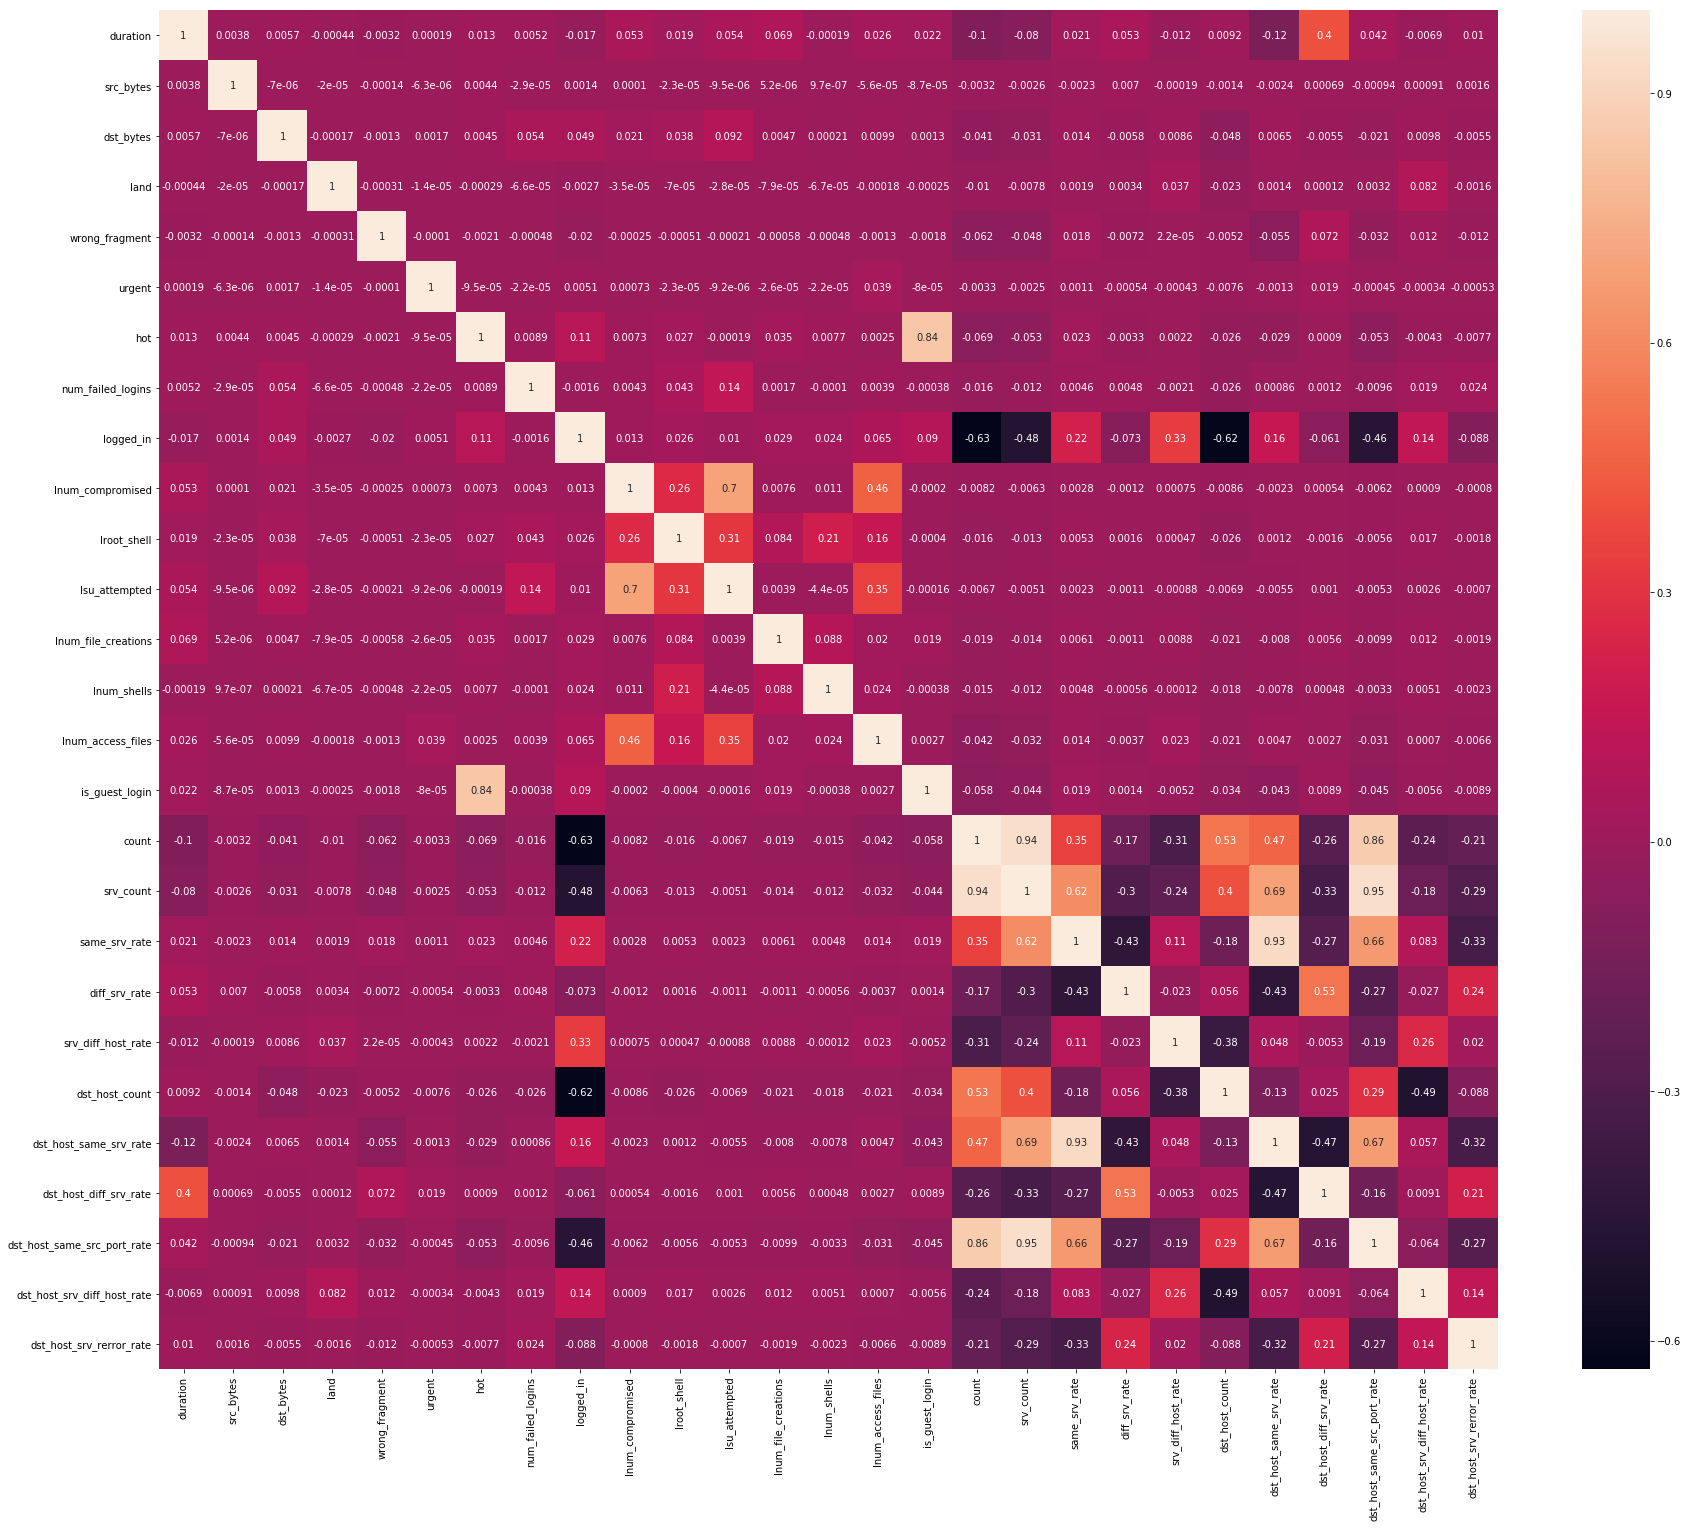

In [13]:
corr=train.corr()
plt.figure(figsize=(30,25))
sns.heatmap(corr,annot=True)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395216 entries, 220207 to 38752
Data columns (total 31 columns):
duration                       395216 non-null int64
protocol_type                  395216 non-null object
service                        395216 non-null object
flag                           395216 non-null object
src_bytes                      395216 non-null int64
dst_bytes                      395216 non-null int64
land                           395216 non-null int64
wrong_fragment                 395216 non-null int64
urgent                         395216 non-null int64
hot                            395216 non-null int64
num_failed_logins              395216 non-null int64
logged_in                      395216 non-null int64
lnum_compromised               395216 non-null int64
lroot_shell                    395216 non-null int64
lsu_attempted                  395216 non-null int64
lnum_file_creations            395216 non-null int64
lnum_shells                    395

In [15]:
from collections import defaultdict
def def_value(): 
    return 1
class_map = defaultdict(def_value) 
class_map["normal"] = 0
train['label'] = train['label'].map(class_map)

In [16]:
train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_srv_rerror_rate,label
220207,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,1.00,0.00,0.00,255,1.00,0.00,1.00,0.00,0.0,1
475473,0,tcp,private,REJ,0,0,0,0,0,0,...,0.01,0.07,0.00,255,0.01,0.07,0.00,0.00,1.0,1
485100,0,udp,domain_u,SF,44,110,0,0,0,0,...,1.00,0.00,0.00,255,1.00,0.01,0.00,0.00,0.0,0
170839,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,1.00,0.00,0.00,255,1.00,0.00,1.00,0.00,0.0,1
49159,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,1.00,0.00,0.00,255,1.00,0.00,1.00,0.00,0.0,1
258306,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,1.00,0.00,0.00,255,1.00,0.00,1.00,0.00,0.0,1
72127,0,tcp,private,S0,0,0,0,0,0,0,...,0.13,0.07,0.00,255,0.05,0.06,0.00,0.00,0.0,1
285607,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,1.00,0.00,0.00,255,1.00,0.00,1.00,0.00,0.0,1
62330,0,tcp,private,S0,0,0,0,0,0,0,...,0.11,0.06,0.00,255,0.05,0.07,0.00,0.00,0.0,1
146751,0,udp,other,SF,147,0,0,0,0,0,...,1.00,0.00,0.00,255,0.00,0.90,1.00,0.00,0.0,0


In [17]:
train.columns = train.columns.str.strip()

In [18]:
train = pd.get_dummies(train,columns=['protocol_type'])

In [19]:
train

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_srv_rerror_rate,label,protocol_type_icmp,protocol_type_tcp,protocol_type_udp
220207,0,ecr_i,SF,1032,0,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,1,1,0,0
475473,0,private,REJ,0,0,0,0,0,0,0,...,255,0.01,0.07,0.00,0.00,1.0,1,0,1,0
485100,0,domain_u,SF,44,110,0,0,0,0,0,...,255,1.00,0.01,0.00,0.00,0.0,0,0,0,1
170839,0,ecr_i,SF,1032,0,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,1,1,0,0
49159,0,ecr_i,SF,1032,0,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,1,1,0,0
258306,0,ecr_i,SF,1032,0,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,1,1,0,0
72127,0,private,S0,0,0,0,0,0,0,0,...,255,0.05,0.06,0.00,0.00,0.0,1,0,1,0
285607,0,ecr_i,SF,1032,0,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,1,1,0,0
62330,0,private,S0,0,0,0,0,0,0,0,...,255,0.05,0.07,0.00,0.00,0.0,1,0,1,0
146751,0,other,SF,147,0,0,0,0,0,0,...,255,0.00,0.90,1.00,0.00,0.0,0,0,0,1


In [20]:
train.drop(['protocol_type_icmp'],axis=1,inplace=True)

In [21]:
train.groupby('flag')['label'].value_counts()

flag    label
OTH     1             5
        0             1
REJ     1         17222
        0          4278
RSTO    1           417
        0            58
RSTOS0  1             9
RSTR    1           692
        0            25
S0      1         69500
        0            39
S1      0            40
        1             2
S2      0            12
        1             5
S3      0             2
        1             1
SF      1        229475
        0         73339
SH      1            94
Name: label, dtype: int64

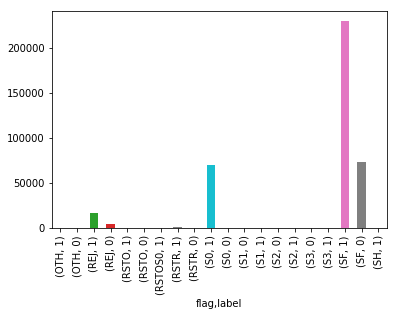

In [22]:
fig, ax = plt.subplots()
train.groupby('flag')['label'].value_counts().plot(ax=ax, kind='bar')

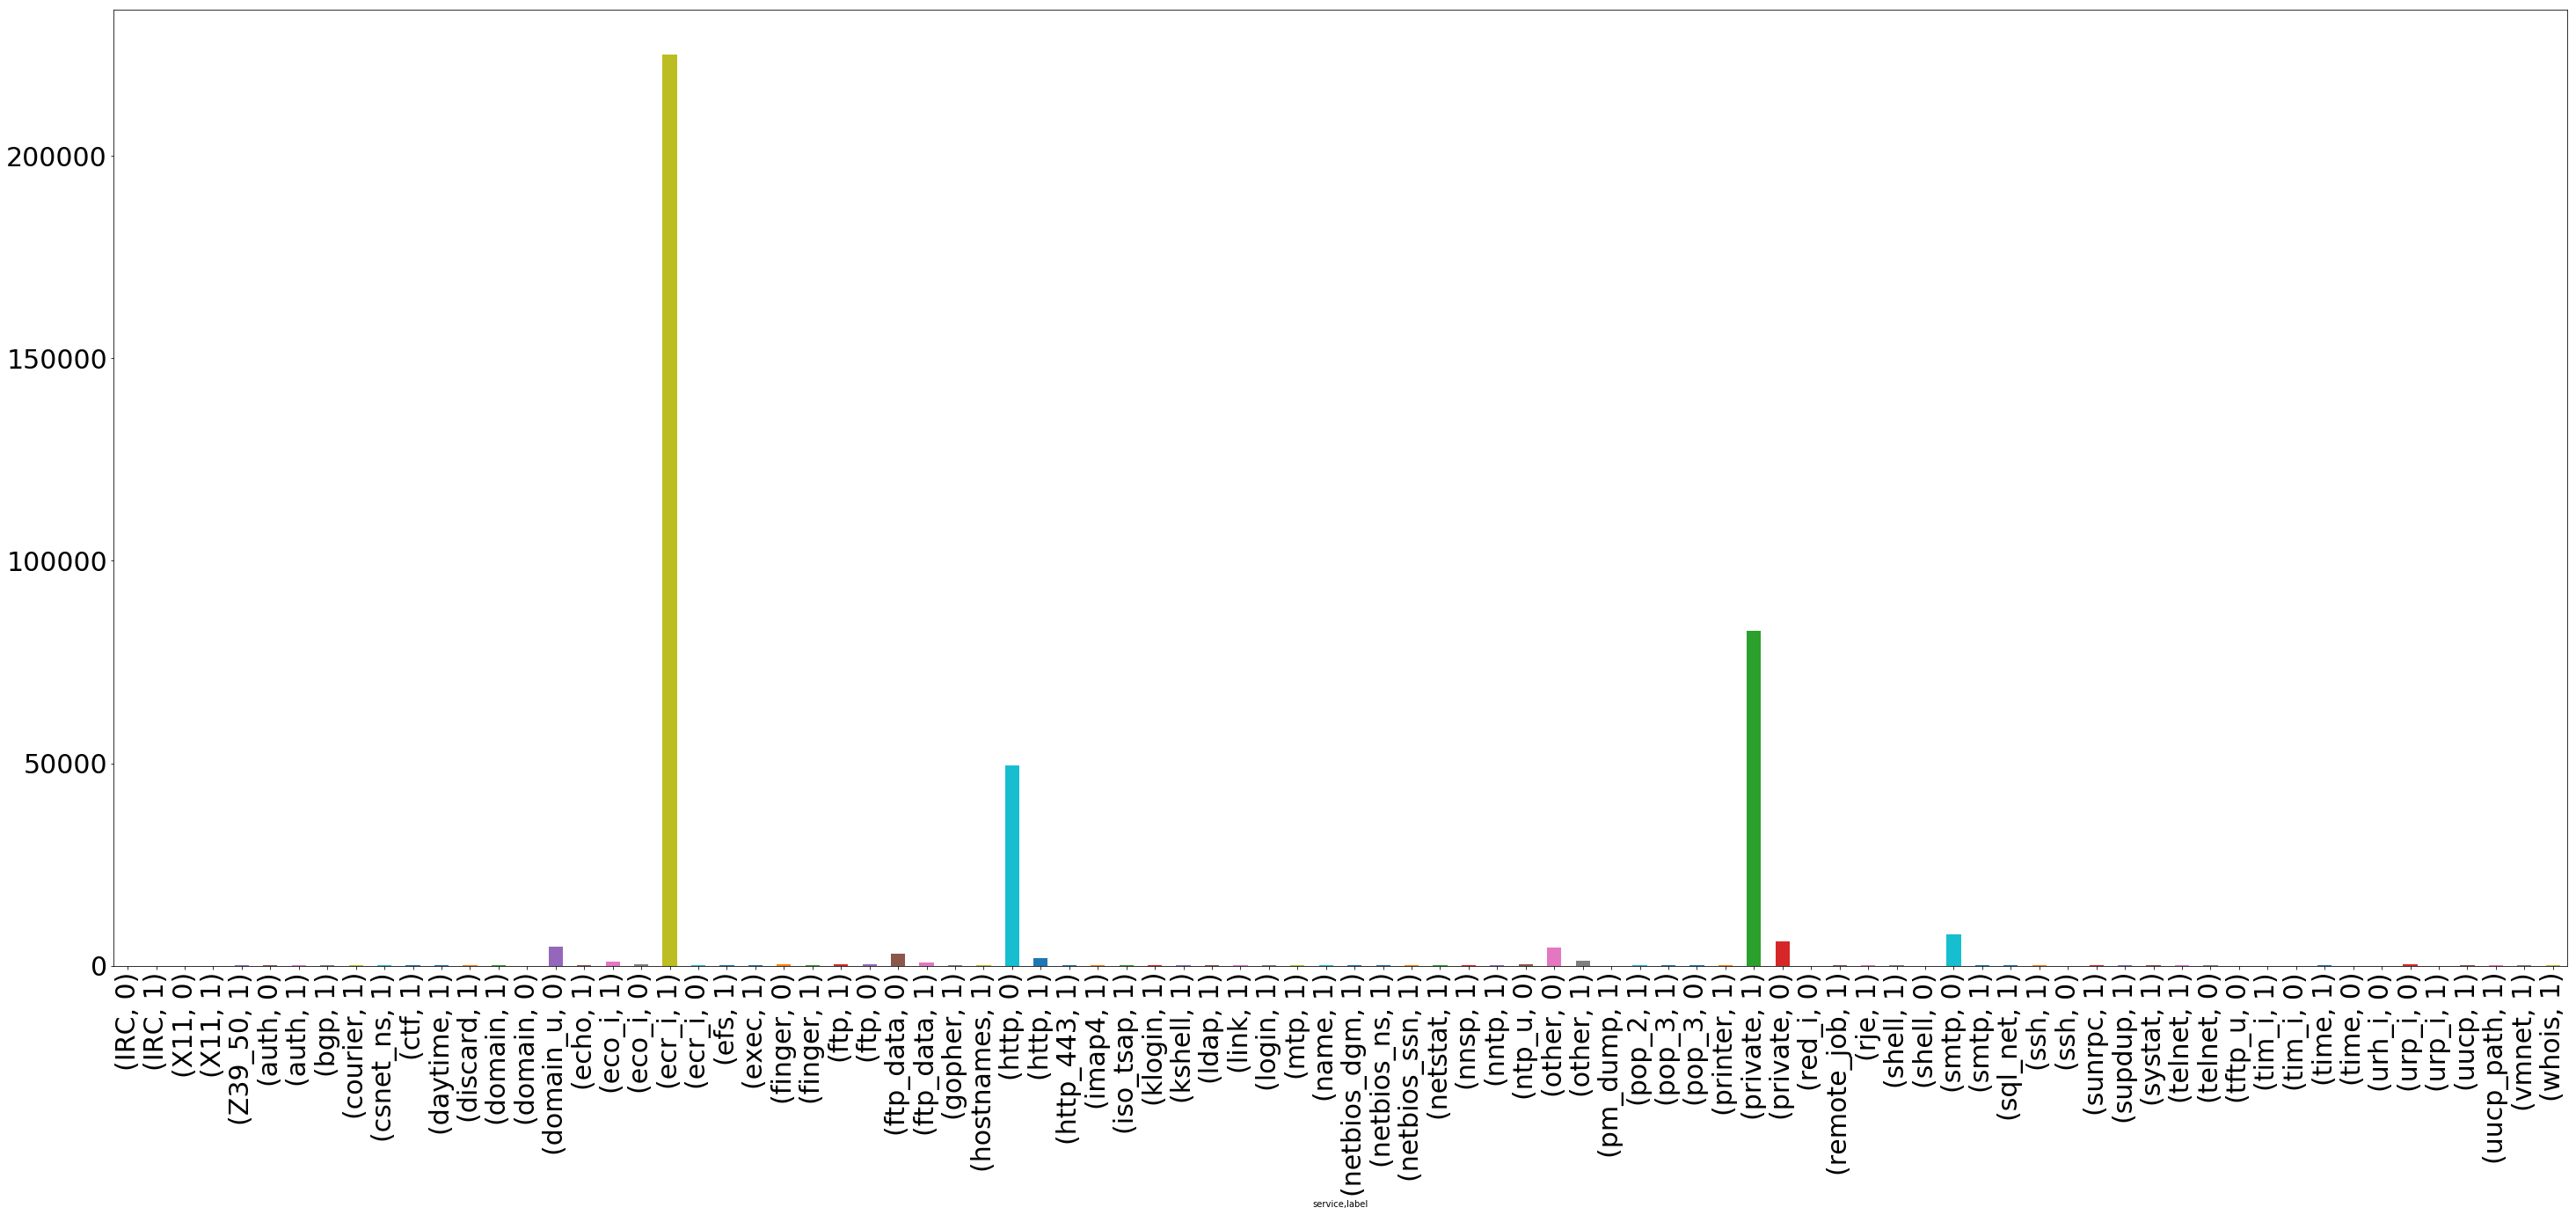

In [23]:
fig, ax = plt.subplots()
train.groupby('service')['label'].value_counts().plot(ax=ax, kind='bar',figsize=(50,20),fontsize=30)

In [24]:
from sklearn import preprocessing
service = preprocessing.LabelEncoder()
train['service']=service.fit_transform(train['service'])

from collections import defaultdict
service_mapping = dict(zip(service.classes_, service.transform(service.classes_)))
service_mapping=defaultdict(lambda: train['service'].max()+1, service_mapping)

In [25]:
flag = preprocessing.LabelEncoder()
train['flag']=flag.fit_transform(train['flag'])
flag_mapping = dict(zip(flag.classes_, flag.transform(flag.classes_)))
flag_mapping=defaultdict(lambda: train['flag'].max()+1, flag_mapping)

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395216 entries, 220207 to 38752
Data columns (total 32 columns):
duration                       395216 non-null int64
service                        395216 non-null int64
flag                           395216 non-null int64
src_bytes                      395216 non-null int64
dst_bytes                      395216 non-null int64
land                           395216 non-null int64
wrong_fragment                 395216 non-null int64
urgent                         395216 non-null int64
hot                            395216 non-null int64
num_failed_logins              395216 non-null int64
logged_in                      395216 non-null int64
lnum_compromised               395216 non-null int64
lroot_shell                    395216 non-null int64
lsu_attempted                  395216 non-null int64
lnum_file_creations            395216 non-null int64
lnum_shells                    395216 non-null int64
lnum_access_files              395216

In [27]:
dic=train.corr().loc['label'].sort_values().to_dict()

In [28]:
dic

{'count': 0.7528031298504629,
 'diff_srv_rate': 0.01684617405106721,
 'dst_bytes': -0.03893002139745913,
 'dst_host_count': 0.6419015971728901,
 'dst_host_diff_srv_rate': -0.11513814766835063,
 'dst_host_same_src_port_rate': 0.48200297972389244,
 'dst_host_same_srv_rate': -0.10968274500359873,
 'dst_host_srv_diff_host_rate': -0.202560958192696,
 'dst_host_srv_rerror_rate': 0.0035434486732766005,
 'duration': -0.1178334596337419,
 'flag': -0.1553254600376203,
 'hot': -0.005930374876158812,
 'is_guest_login': -0.0326675049558546,
 'label': 1.0,
 'land': 0.003246916211979511,
 'lnum_access_files': -0.05299834937837509,
 'lnum_compromised': -0.004523223730293655,
 'lnum_file_creations': -0.019018482385703788,
 'lnum_shells': -0.014949648073295838,
 'logged_in': -0.794931699294734,
 'lroot_shell': -0.004259693689609002,
 'lsu_attempted': -0.008709869999548167,
 'num_failed_logins': -0.0011582500018007546,
 'protocol_type_tcp': -0.4121323084038175,
 'protocol_type_udp': -0.38858707985549246,

In [29]:
drop=[]
for i in dic.items():
    if(abs(i[1])<0.1):
        drop.append(i[0])
print(drop)

['wrong_fragment', 'lnum_shells', 'dst_bytes', 'is_guest_login', 'urgent', 'lnum_access_files', 'hot', 'land', 'lnum_file_creations', 'lnum_compromised', 'num_failed_logins', 'lroot_shell', 'lsu_attempted', 'src_bytes', 'diff_srv_rate', 'dst_host_srv_rerror_rate']


In [30]:
X=train.copy()
y=train['label']
X=X.drop(['label'],axis=1)

In [31]:
val

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
424269,0,icmp,ecr_i,SF,520,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf
443643,0,icmp,ecr_i,SF,520,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf
431655,0,icmp,ecr_i,SF,520,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf
300827,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf
105854,0,tcp,http,SF,243,833,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.0,0.0,0.0,0.0,normal
409543,0,icmp,ecr_i,SF,520,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf
193798,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf
102479,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf
472081,0,tcp,private,REJ,0,0,0,0,0,0,...,9,0.04,0.07,0.00,0.00,0.0,0.0,1.0,1.0,neptune
370047,0,tcp,http,REJ,0,0,0,0,0,0,...,1,0.00,1.00,1.00,0.00,0.0,0.0,1.0,1.0,portsweep


In [32]:
val.drop(['lnum_outbound_cmds','is_host_login'],axis=1, inplace=True)
val.drop(['serror_rate','rerror_rate'],axis=1,inplace=True)
val.drop(['dst_host_srv_count','dst_host_serror_rate','dst_host_rerror_rate'],axis=1,inplace=True)
val.drop(['dst_host_srv_serror_rate','srv_serror_rate','srv_rerror_rate'],axis=1,inplace=True)
val = pd.get_dummies(val, columns=['protocol_type'])
val['service']=val['service'].map(service_mapping)
val['flag']=val['flag'].map(flag_mapping)

train,val=train.align(val, join='left',fill_value=0, axis=1)
print(train.shape,val.shape)

(395216, 32) (98804, 32)


In [33]:
X.drop(drop,axis=1, inplace=True)

In [34]:
val

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,srv_diff_host_rate,dst_host_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_srv_rerror_rate,label,protocol_type_tcp,protocol_type_udp
424269,0,14,9,520,0,0,0,0,0,0,...,0.00,255,1.00,0.00,1.00,0.00,0.0,smurf,0,0
443643,0,14,9,520,0,0,0,0,0,0,...,0.00,255,1.00,0.00,1.00,0.00,0.0,smurf,0,0
431655,0,14,9,520,0,0,0,0,0,0,...,0.00,255,1.00,0.00,1.00,0.00,0.0,smurf,0,0
300827,0,14,9,1032,0,0,0,0,0,0,...,0.00,255,1.00,0.00,1.00,0.00,0.0,smurf,0,0
105854,0,22,9,243,833,0,0,0,0,0,...,0.11,139,1.00,0.00,0.01,0.01,0.0,normal,1,0
409543,0,14,9,520,0,0,0,0,0,0,...,0.00,255,1.00,0.00,1.00,0.00,0.0,smurf,0,0
193798,0,14,9,1032,0,0,0,0,0,0,...,0.00,255,1.00,0.00,1.00,0.00,0.0,smurf,0,0
102479,0,14,9,1032,0,0,0,0,0,0,...,0.00,255,1.00,0.00,1.00,0.00,0.0,smurf,0,0
472081,0,45,1,0,0,0,0,0,0,0,...,0.00,255,0.04,0.07,0.00,0.00,1.0,neptune,1,0
370047,0,22,1,0,0,0,0,0,0,0,...,0.00,255,0.00,1.00,1.00,0.00,1.0,portsweep,1,0


In [35]:
val['label']=val['label'].map(class_map)

In [40]:
val_y=val['label'] 
val_X=val.drop(['label'],axis=1)
val_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98804 entries, 424269 to 132634
Data columns (total 31 columns):
duration                       98804 non-null int64
service                        98804 non-null int64
flag                           98804 non-null int64
src_bytes                      98804 non-null int64
dst_bytes                      98804 non-null int64
land                           98804 non-null int64
wrong_fragment                 98804 non-null int64
urgent                         98804 non-null int64
hot                            98804 non-null int64
num_failed_logins              98804 non-null int64
logged_in                      98804 non-null int64
lnum_compromised               98804 non-null int64
lroot_shell                    98804 non-null int64
lsu_attempted                  98804 non-null int64
lnum_file_creations            98804 non-null int64
lnum_shells                    98804 non-null int64
lnum_access_files              98804 non-null int64
i

In [42]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0.05)
constant_filter.fit(X)
len(X.columns[constant_filter.get_support()])

11

In [43]:
qconstant_columns = [column for column in X.columns if column not in X.columns[constant_filter.get_support()]]
print(qconstant_columns)

['srv_diff_host_rate', 'dst_host_diff_srv_rate', 'dst_host_srv_diff_host_rate', 'protocol_type_udp']


In [44]:
X.drop(qconstant_columns,axis=1,inplace=True)
val_X.drop(qconstant_columns,axis=1,inplace=True)

In [45]:
X.isnull().sum()

duration                       0
service                        0
flag                           0
logged_in                      0
count                          0
srv_count                      0
same_srv_rate                  0
dst_host_count                 0
dst_host_same_srv_rate         0
dst_host_same_src_port_rate    0
protocol_type_tcp              0
dtype: int64

In [53]:
val_X.drop(drop,axis=1, inplace=True)

In [54]:
np.shape(X)


(395216, 11)

In [55]:
np.shape(val_X)

(98804, 11)

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
X_scale = scaler.fit_transform(X) 
val_X_scale = scaler.transform(val_X) 

In [57]:
X_scale

array([[-0.06746172, -0.6948597 ,  0.51401891, ...,  0.5991352 ,
         0.82700364, -0.79050961],
       [-0.06746172,  1.59474728, -3.04030115, ..., -1.81128148,
        -1.2506968 ,  1.26500677],
       [-0.06746172, -0.91643457,  0.51401891, ...,  0.5991352 ,
        -1.2506968 , -0.79050961],
       ...,
       [-0.06746172, -0.6948597 ,  0.51401891, ...,  0.5991352 ,
         0.82700364, -0.79050961],
       [-0.06746172, -0.6948597 ,  0.51401891, ...,  0.5991352 ,
         0.82700364, -0.79050961],
       [-0.06746172, -0.10399338,  0.51401891, ...,  0.5991352 ,
        -1.12603477,  1.26500677]])

In [58]:
val_X_scale

array([[-0.06746172, -0.6948597 ,  0.51401891, ...,  0.5991352 ,
         0.82700364, -0.79050961],
       [-0.06746172, -0.6948597 ,  0.51401891, ...,  0.5991352 ,
         0.82700364, -0.79050961],
       [-0.06746172, -0.6948597 ,  0.51401891, ...,  0.5991352 ,
         0.82700364, -0.79050961],
       ...,
       [-0.06746172, -0.6948597 ,  0.51401891, ...,  0.5991352 ,
         0.82700364, -0.79050961],
       [-0.06746172, -0.6948597 ,  0.51401891, ...,  0.5991352 ,
         0.82700364, -0.79050961],
       [-0.06746172, -0.6948597 ,  0.51401891, ...,  0.5991352 ,
         0.82700364, -0.79050961]])

In [59]:
from sklearn.metrics import accuracy_score
acc_train = []
acc_val = []
Algorithm = []
Feat_Selection=[]

In [60]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()#solver='lbfgs', alpha=0.5, random_state=1)
clf.fit(X_scale, y)
y_pred=clf.predict(val_X_scale)
y_train=y
train_pred=clf.predict(X_scale)

Algorithm.append('MLPClassifier')
Feat_Selection.append('Embedded - tree based')
acc_train.append(accuracy_score(y_train, train_pred, normalize=False))
acc_val.append(accuracy_score(val_y, y_pred, normalize=False))
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(val_y, y_pred).ravel()
(tn, fp, fn, tp)

(19431, 52, 444, 78877)

In [61]:
from sklearn.neural_network import MLPClassifier
clf1 = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf1.fit(X_scale, y)
y_pred=clf1.predict(val_X_scale)
y_train=y
train_pred=clf1.predict(X_scale)

Algorithm.append('MLPClassifier')
Feat_Selection.append('Filter')
acc_train.append(accuracy_score(y_train, train_pred, normalize=False))
acc_val.append(accuracy_score(val_y, y_pred, normalize=False))

tn, fp, fn, tp = confusion_matrix(val_y, y_pred).ravel()
(tn, fp, fn, tp)

(19328, 155, 601, 78720)

In [62]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_scale, y)
y_pred=clf.predict(val_X_scale)
y_train=y
train_pred=clf.predict(X_scale)

Algorithm.append('DecisionTreeClassifier')
Feat_Selection.append('Filter')
acc_train.append(accuracy_score(y_train, train_pred, normalize=False))
acc_val.append(accuracy_score(val_y, y_pred, normalize=False))
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(val_y, y_pred).ravel()
(tn, fp, fn, tp)

(19422, 61, 416, 78905)

In [63]:
Comparison = pd.DataFrame(list(zip(Algorithm, Feat_Selection, acc_train, acc_val)), 
                          columns = ['Algorithm', 'Feature Selection Method', 'Accuracy on train', 'accuracy on val'])
Comparison

,Algorithm,Feature Selection Method,Accuracy on train,accuracy on val
0,MLPClassifier,Embedded - tree based,393086,98308
1,MLPClassifier,Filter,392006,98048
2,DecisionTreeClassifier,Filter,393576,98327


In [67]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from tensorflow.keras.callbacks import EarlyStopping

X_scale = np.asarray(X_scale)
y = np.asarray(y)
val_X_scale = np.asarray(val_X_scale)
val_y = np.asarray(val_y)


model = Sequential()
model.add(Dense(10, input_dim=X_scale.shape[1], activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                         patience=5, verbose=1, mode='auto',
                        restore_best_weights=True)
model.fit(X_scale,y, verbose=2, epochs=10,validation_data=(val_X_scale,val_y))


TypeError: __init__() got an unexpected keyword argument 'restore_best_weights'